In [1]:
import numpy
import matplotlib.pyplot as plt
from random import randint
from math import sqrt, pow
%matplotlib inline

In [2]:
def gerarCentroidesAleatorios(data, qtd):
    #A primeira coisa a fazer é descobrir quantos dados há e de quantas dimensões eles são
    qtdDados = data.shape[0]
    qtdDimensoes = data.shape[1]
    
    #Preciso de k centroides. Esses centroides serao pontos aleatórios
    indexCentroides = []
    centroides = []
        
    #O for gera k centroides
    for k in range(0, qtd):           
        indexRepetido = 1
        #Garantindo que nenhum centroide será repetido
        while indexRepetido == 1:
            novoIndexCentroide = randint(0, (qtdDados - 1))
            indexRepetido = 0
            for ponto in indexCentroides:
                if ponto == novoIndexCentroide:
                    indexRepetido = 1
                    continue    
        #Adicionando um novo centroide
        indexCentroides.append(novoIndexCentroide)
        centroides.append(data[novoIndexCentroide])                       
        
    centroides = numpy.array(centroides)        
    return centroides

In [3]:
def definirCluster(ponto, centroides):
    qtdDimensoes = ponto.shape[0]
    qtdCentroides = centroides.shape[0]
    indexCentroideMaisProximo = -1
    menorDistancia = -1
    
    for indexCentroideAtual in range(0, qtdCentroides):
        somaQuadrados = 0
        for dimensao in range(0, qtdDimensoes):
            somaQuadrados += pow(ponto[dimensao] - centroides[indexCentroideAtual][dimensao], 2)
        distanciaAtual = sqrt(somaQuadrados)
        if indexCentroideAtual == 0:
            indexCentroideMaisProximo = 0
            menorDistancia = distanciaAtual
        else:
            if distanciaAtual < menorDistancia:
                indexCentroideMaisProximo = indexCentroideAtual
                menorDistancia = distanciaAtual     
    
    return indexCentroideMaisProximo

In [4]:
def gerarY(data, centroides):
    y = []    
        
    #medindo a distância euclidiana de cada ponto em relação a cada centroide
    for ponto in data:
        y.append(definirCluster(ponto, centroides))
        
    y = numpy.array(y)
    
    return y

In [5]:
def definirCentroidePorPontos(pontos):
    
    qtdDimensoes = pontos.shape[1]
    
    centroCadaDimensao = []
    
    for dimensao in range(0, qtdDimensoes):
        centroCadaDimensao.append(numpy.mean(pontos[:,dimensao]))
        
    return numpy.array(centroCadaDimensao)

In [6]:
def recalcularCentroides(x, y, qtdClusters):

    centroidesNovos = []
    
    for clusterAtual in range(0, qtdClusters):
        pontosDoClusterAtual = []
        for index, clusterY in enumerate(y):
            if clusterY == clusterAtual:
                pontosDoClusterAtual.append(x[index])
        pontosDoClusterAtual = numpy.array(pontosDoClusterAtual)
        
        if pontosDoClusterAtual.size == 0:
            return numpy.array([-1])
        
        centroidesNovos.append(definirCentroidePorPontos(pontosDoClusterAtual))
            
    centroidesNovos = numpy.array(centroidesNovos)
    return centroidesNovos    

In [71]:
def simpleKMeans(data, kClusters):
    #gerando os centroides iniciais aleatórios
    centroides = gerarCentroidesAleatorios(data, kClusters)
    
    #gerando o "target"
    y = gerarY(data, centroides)
        
    #recalculando os centroides até que sejam iguais
    centroidesNovos = numpy.array([-1])
    while not(numpy.array_equal(centroidesNovos, centroides)):
        #printar(data, y)
        
        while numpy.array_equal(centroidesNovos, numpy.array([-1])):
            centroidesNovos = recalcularCentroides(data, y, kClusters)
        
        y = gerarY(data, centroidesNovos)
        centroides = centroidesNovos
        
    
    #printar(data, y)
    
    return centroidesNovos, y

In [8]:
def KMeans(data, kClusters, nRepeticoes):
    
    somaVariancias = []
    ys = []
    
    for i in range(0, nRepeticoes):
        #para cada repetição vou receber o y do simpleKMeans e calcular a soma das variancias de cada cluster
        centroides, y = simpleKMeans(data, kClusters)
        somaVariancias.append(calcularSomaVariancias(data, y, centroides))
        ys.append(y)
        
        printar(data, y)
        
    indexMenorSomaVariancias = 0
    
    for index, somaVarianciasAtual in enumerate(somaVariancias):
        if somaVarianciasAtual < somaVariancias[indexMenorSomaVariancias]:
            indexMenorSomaVariancias = index

    ys = numpy.array(ys)
    
    print(somaVariancias)
    print(indexMenorSomaVariancias)
    
    return ys[indexMenorSomaVariancias]    

In [37]:
def calcularSomaVariancias(x, y, centroides):
    
    qtdClusters = centroides.shape[0]
    qtdDimensoes = x.shape[1]
    
    dadosEDistancias = [] #[clusterPertencente, distanciaAoCentroide]
    varianciaCadaCluster = []
    
    #Vou passar ponto por ponto pra criar o vetor dadosEDistancias
    for index, pontoAtual in enumerate(x):
        clusterPertencente = y[index]
        centroideAtual = centroides[clusterPertencente]
        
        #calculando a distancia entre o ponto atual e seu centroide
        somaQuadrados = 0
        for dimensao in range(0, qtdDimensoes):
            somaQuadrados += pow(pontoAtual[dimensao] - centroideAtual[dimensao], 2)
        distanciaAoCentroide = sqrt(somaQuadrados)
        
        #colocando esse ponto e essa distância no vetor dadosEDistancias
        dadosEDistancias.append([clusterPertencente, distanciaAoCentroide])
    
    #Agora vou preencher o vetor varianciaCadaCluster
    for clusterAtual in range(0, qtdClusters):
        
        distanciasDoClusterAtual = []
        
        #preenchendo o vetor distanciasDoClusterAtual
        for dadoAtual in dadosEDistancias:
            if dadoAtual[0] == clusterAtual:
                distanciasDoClusterAtual.append(dadoAtual[1])
                
        #agora que ja tenho todas as distancias do cluster atual, calculo a variancia desse cluster
        #e coloco no vetor varianciaCadaCluster
        distanciasDoClusterAtual = numpy.array(distanciasDoClusterAtual)
        varianciaCadaCluster.append(numpy.var(distanciasDoClusterAtual))

    print(varianciaCadaCluster)
    #retorno a soma das variancias
    varianciaCadaCluster = numpy.array(varianciaCadaCluster)
    
    return numpy.sum(varianciaCadaCluster)

In [10]:
def printar(x, y):
    plt.figure()
    plt.scatter(x=x[:, 0], y=x[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Training Set Clusters')

In [59]:
def printarComCentroides(x, y, centroides):
    plt.figure()
    plt.scatter(x=x[:, 0], y=x[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Training Set Clusters')
    
    plt.scatter(x=centroides[:,0], y=centroides[:,1], c='r', marker='X')


Text(0.5, 1.0, 'Training Set Clusters')

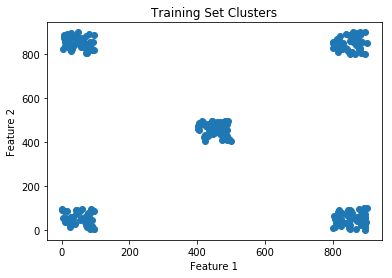

In [15]:
x = []

#aleatorios
for i in range(0, 50):
    x.append([randint(0, 100), randint(0, 100)])
    
for i in range(0, 50):
    x.append([randint(400, 500), randint(400, 500)])
    
for i in range(0, 50):
    x.append([randint(800, 900), randint(800, 900)])
    
for i in range(0, 50):
    x.append([randint(0, 100), randint(800, 900)])
    
for i in range(0, 50):
    x.append([randint(800, 900), randint(0, 100)])
    
# for i in range(0, 1000):
#     x.append([randint(0, 1000), randint(0, 1000)])

x = numpy.array(x)

plt.figure()
plt.scatter(x=x[:, 0], y=x[:, 1], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Set Clusters')

[731.9041318696873, 224.91480734604684, 826.2417482047342, 949.8356655892794, 348.6104190920123]
Soma das Variâncias: 3081.50677210176


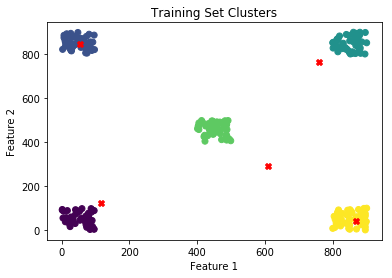

In [74]:
centroides, y = simpleKMeans(x, 5)
soma = calcularSomaVariancias(x, y, centroides)
print("Soma das Variâncias:", soma)
printarComCentroides(x, y, centroides)